In [81]:
from datasets import load_dataset

ds = load_dataset("imagefolder", data_dir="datas/train")
val_ds = load_dataset("imagefolder", data_dir="datas/val")

Resolving data files:   0%|          | 0/1350 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/150 [00:00<?, ?it/s]

In [82]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1350
    })
})

In [83]:
val_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 150
    })
})

In [84]:
ex = ds['train'][15]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=175x225>,
 'label': 0}

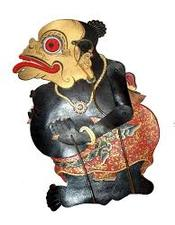

In [85]:
image = ex['image']
image

In [86]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['bagong', 'cepot', 'gareng', 'petruk', 'semar'], id=None)

In [87]:
labels.int2str(ex['label'])

'bagong'

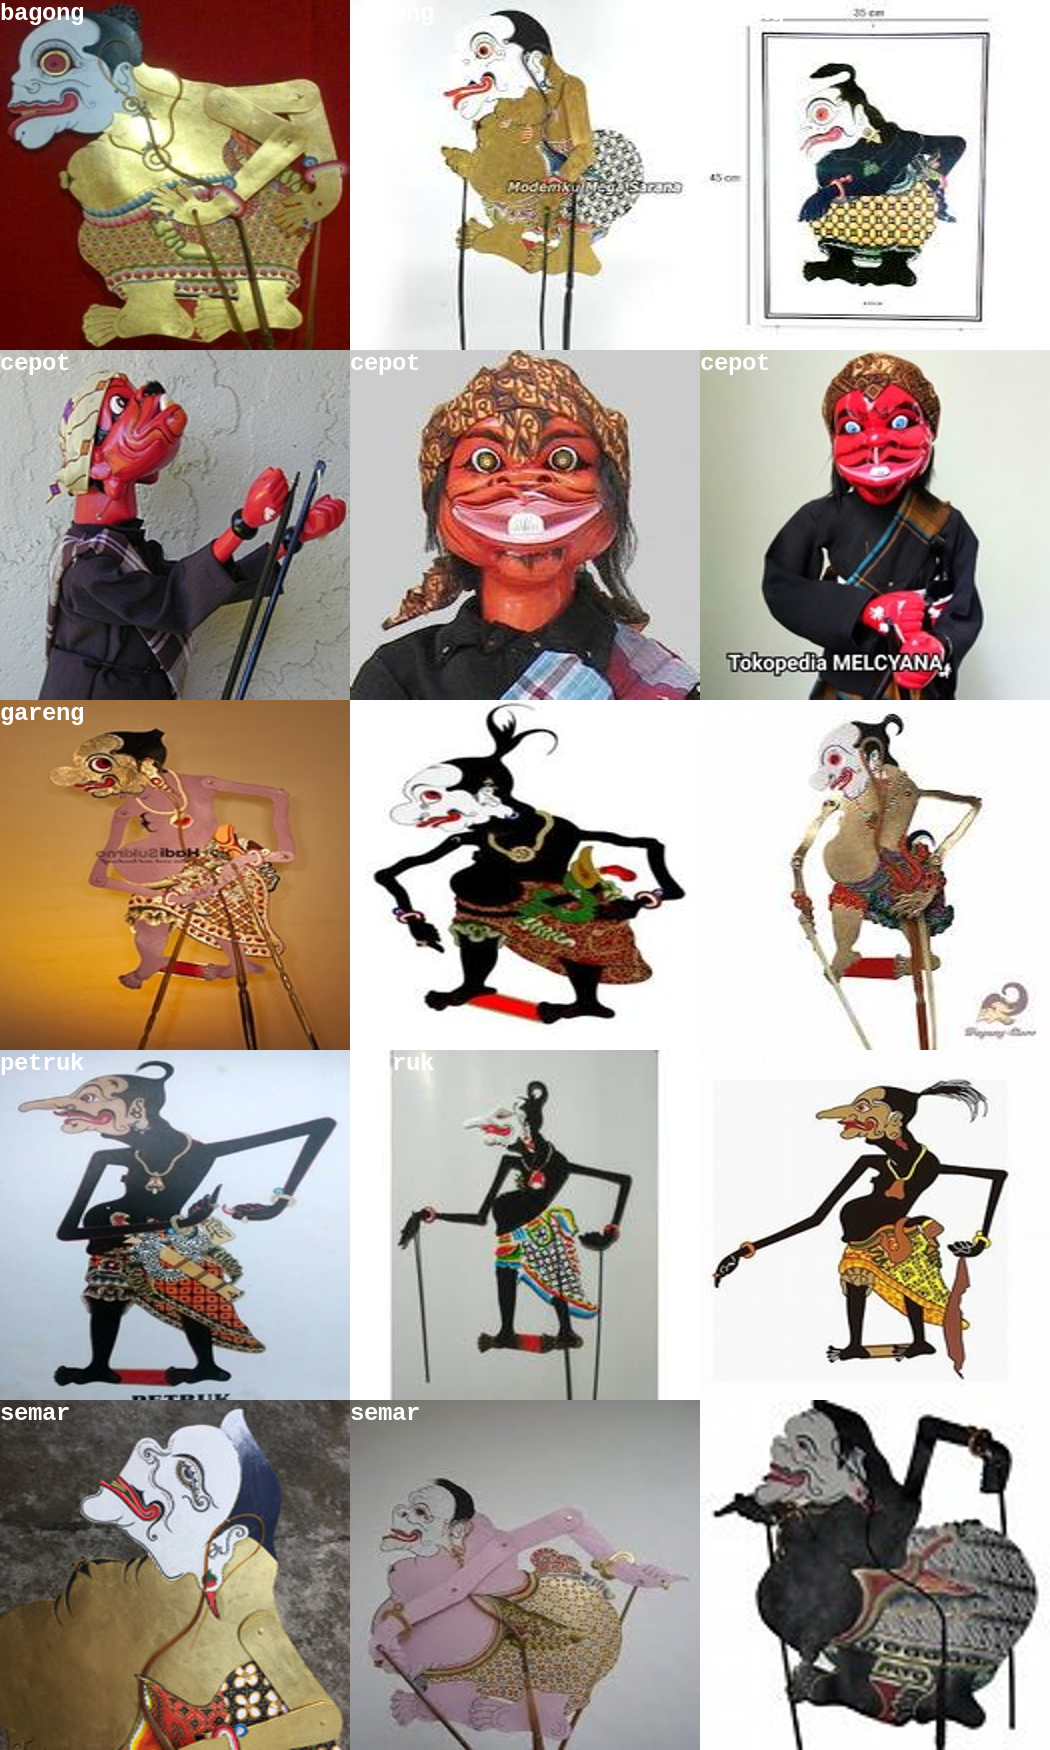

In [88]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)


In [89]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)
processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [103]:
processor(image, return_tensors='pt')

{'pixel_values': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])}

In [104]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['label']
    return inputs

In [105]:
process_example(ds['train'][0])


{'pixel_values': tensor([[[[0.6235, 0.6000, 0.6000,  ..., 0.7020, 0.7020, 0.7098],
          [0.6157, 0.6000, 0.6000,  ..., 0.7020, 0.6863, 0.6863],
          [0.6078, 0.5922, 0.5922,  ..., 0.7098, 0.7098, 0.7176],
          ...,
          [0.2941, 0.3098, 0.3098,  ..., 0.3961, 0.3725, 0.3882],
          [0.3176, 0.3176, 0.3020,  ..., 0.3255, 0.3412, 0.4353],
          [0.3255, 0.3020, 0.2941,  ..., 0.3882, 0.3569, 0.3020]],

         [[0.5451, 0.5216, 0.5216,  ..., 0.6235, 0.6235, 0.6314],
          [0.5373, 0.5216, 0.5216,  ..., 0.6235, 0.6078, 0.6078],
          [0.5294, 0.5137, 0.5137,  ..., 0.6314, 0.6314, 0.6392],
          ...,
          [0.2078, 0.2235, 0.2235,  ..., 0.2784, 0.2549, 0.2706],
          [0.2314, 0.2314, 0.2157,  ..., 0.2235, 0.2392, 0.3333],
          [0.2314, 0.2157, 0.2000,  ..., 0.3020, 0.2706, 0.2157]],

         [[0.5529, 0.5294, 0.5294,  ..., 0.6314, 0.6314, 0.6392],
          [0.5451, 0.5294, 0.5294,  ..., 0.6314, 0.6157, 0.6157],
          [0.5373, 0.5216

In [106]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['label']
    return inputs


In [107]:
prepared_ds = ds.with_transform(transform)
prepared_val_ds = val_ds.with_transform(transform)
# prepared_test_ds = test_ds.with_transform(transform)

In [108]:
prepared_ds['train'][0:2]
prepared_val_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.2078, -0.2157, -0.2078,  ..., -0.2863, -0.2863, -0.2863],
          [-0.2314, -0.2392, -0.2235,  ..., -0.2863, -0.2863, -0.2863],
          [-0.2392, -0.2549, -0.2157,  ..., -0.2863, -0.2863, -0.2863],
          ...,
          [-0.2863, -0.2863, -0.2863,  ..., -0.2706, -0.2706, -0.2706],
          [-0.2863, -0.2863, -0.2863,  ..., -0.2706, -0.2706, -0.2706],
          [-0.2863, -0.2863, -0.2863,  ..., -0.2706, -0.2706, -0.2706]],

         [[-0.8824, -0.8824, -0.8667,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8980, -0.9137, -0.8824,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9059, -0.9216, -0.8980,  ..., -0.9922, -0.9922, -0.9922],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9922, -0.9922, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9922, -0.9922, -0.9922,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8902, -0.8980, -0.8824,  ..., -0.9765, -0.9765, -0.9765],
          [-0

In [109]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [63]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


In [110]:
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [111]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./VIT-imageClassification",
  per_device_train_batch_size=32,
  evaluation_strategy="steps",
  num_train_epochs=1,
  # fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


In [112]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_val_ds['train'],
    tokenizer=processor,
)

In [113]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss


***** train metrics *****
  epoch                    =        1.0
  total_flos               = 97432172GF
  train_loss               =     0.4767
  train_runtime            = 0:00:30.99
  train_samples_per_second =     43.549
  train_steps_per_second   =      1.387


In [114]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        1.0
  eval_accuracy           =        1.0
  eval_loss               =     0.1452
  eval_runtime            = 0:00:01.64
  eval_samples_per_second =     91.388
  eval_steps_per_second   =     11.576
